In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


# Sector 20 Update

#### August Model

In [4]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('per_side_count', 20), ('score_var', 'prma_20')]

run1 = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params, test_periods=0)

## Create combo search
comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

comb.add_run(run1)

In [5]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180924123145
Max date: 2018-07-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [05:36<00:00, 16.56s/it]


#### September Model

In [60]:
# drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]
drop_params = [('data_rank_flag', True), ('per_side_count', 20)]

run2 = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params, test_periods=0)

pair = PairSearch()
pair.add_run(run2)
pair.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [02:30<00:00,  7.54s/it]


In [61]:
rollup_returns(pair.best_results_returns)

Qtr,1,2,3,4
Year,,,,
2009,0.000000,0.000000,0.000000,0.000000
2010,0.073661,-0.010730,0.090295,0.002358
2011,0.012756,0.034151,-0.027149,0.111178
2012,0.002292,0.014794,0.053004,0.075615
2013,0.000542,0.030985,0.054653,0.025087
2014,0.021376,0.038583,0.025581,-0.003325
2015,-0.001041,0.052814,-0.049428,0.053577
2016,0.073372,0.050087,-0.005454,0.079294
2017,0.012087,0.091171,0.014339,0.018075


In [32]:
# drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]
drop_params = [('data_rank_flag', True), ('per_side_count', 20)]

run2 = RunManager('StatArbStrategy', 'run_0124', drop_params=drop_params, test_periods=0)

## Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180924134937
Max date: 2018-08-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [04:13<00:00, 12.32s/it]


In [50]:
rollup_returns(comb2.best_results_returns)

Qtr,1,2,3,4
Year,,,,
2009,0.000000,0.000000,0.000000,0.000000
2010,0.064396,-0.012573,0.082250,-0.007379
2011,0.025922,0.011213,-0.023225,0.112136
2012,0.032607,0.003687,0.039791,0.066117
2013,0.001820,0.035284,0.045176,0.019496
2014,0.030695,0.034449,0.003577,-0.006536
2015,-0.000897,0.049565,-0.032947,0.035734
2016,0.086322,0.017845,-0.009860,0.058586
2017,0.015195,0.062084,-0.000387,0.034272


In [19]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,72,1.301841,0.090419,-999.0
1,drop_binaries,False,36,1.328104,0.092169,-999.0
2,drop_binaries,True,36,1.275578,0.088669,-999.0
3,holding_period,3,24,1.345186,0.089906,-999.0
4,holding_period,5,24,1.307254,0.091182,-999.0
5,holding_period,7,24,1.253082,0.090169,-999.0
6,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",72,1.301841,0.090419,-999.0
7,per_side_count,10,72,1.301841,0.090419,-999.0
8,response_days,5,72,1.301841,0.090419,-999.0
9,response_type,Simple,72,1.301841,0.090419,-999.0


#### Sector 45 model for Sector 20

In [8]:
drop_params = [('second_sort_response', 'Response_Simple_10'), 
                ('second_sort_response', 'Response_Smoothed_10')]

run3 = RunManager('StatArbStrategy', 'run_0144', test_periods=0, drop_params=drop_params)

## Create combo search
comb3 = CombinationSearch()
comb3.set_selection_criteria('sharpe')
comb3.params['training_epochs'] = 20

comb3.add_run(run3)
comb3.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180924124359
Max date: 2018-08-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [04:42<00:00, 14.45s/it]


In [20]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,True,432,0.621088,0.054986,-999.0
1,drop_binaries,False,432,0.621088,0.054986,-999.0
2,first_sort_response,Response_Simple_10,72,0.631574,0.057047,-999.0
3,first_sort_response,Response_Simple_2,72,0.621812,0.054822,-999.0
4,first_sort_response,Response_Simple_3,72,0.611379,0.053885,-999.0
5,first_sort_response,Response_Simple_5,72,0.617138,0.054407,-999.0
6,first_sort_response,Response_Smoothed_10,72,0.625222,0.055161,-999.0
7,first_sort_response,Response_Smoothed_5,72,0.619405,0.054597,-999.0
8,holding_period,2,144,0.591260,0.049904,-999.0
9,holding_period,3,144,0.622651,0.055244,-999.0


### Multivar

In [12]:
run4 = RunManager('StatArbStrategy', 'run_0146', test_periods=0)

## Create combo search
comb4 = CombinationSearch()
comb4.set_selection_criteria('sharpe')
comb4.params['training_epochs'] = 20

comb4.add_run(run4)
comb4.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180924125056
Max date: 2018-08-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [04:48<00:00, 14.11s/it]


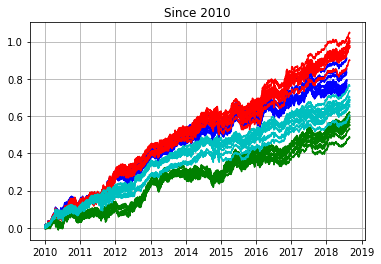

In [18]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'r')
plt.plot(comb3.best_results_returns.cumsum(), 'g')
plt.plot(comb4.best_results_returns.cumsum(), 'c')
plt.title('Since 2010')
plt.grid()
plt.show()

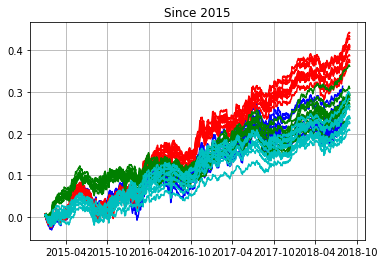

In [17]:
t = dt.date(2015, 1, 1)
plt.figure()
plt.plot(comb.best_results_returns.loc[t:].cumsum(), 'b')
plt.plot(comb2.best_results_returns.loc[t:].cumsum(), 'r')
plt.plot(comb3.best_results_returns.loc[t:].cumsum(), 'g')
plt.plot(comb4.best_results_returns.loc[t:].cumsum(), 'c')
plt.grid()
plt.title('Since 2015')
plt.show()

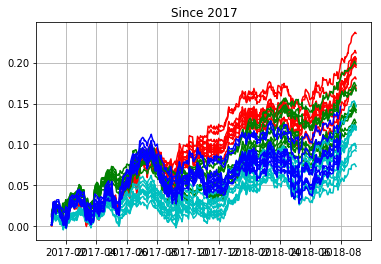

In [23]:
t = dt.date(2017, 1, 1)
plt.figure()
plt.plot(comb2.best_results_returns.loc[t:].cumsum(), 'r')
plt.plot(comb3.best_results_returns.loc[t:].cumsum(), 'g')
plt.plot(comb4.best_results_returns.loc[t:].cumsum(), 'c')
plt.plot(comb.best_results_returns.loc[t:].cumsum(), 'b')
plt.grid()
plt.title('Since 2017')
plt.show()

# Sector 45

In [ ]:
drop_params = []
runB2 = RunManager('StatArbStrategy', 'run_0145', drop_params=drop_params)
runb2.analyze_parameters()

In [58]:
runB0 = RunManager('StatArbStrategy', 'run_0127')
runB1 = RunManager('StatArbStrategy', 'run_0141')
runB2 = RunManager('StatArbStrategy', 'run_0145')
runB3 = RunManager('StatArbStrategy', 'run_0147')

In [46]:
runB0.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.437243,0.038948,-999.0
1,data_rank_flag,True,144,0.542453,0.049111,-999.0
2,drop_binaries,False,144,0.501813,0.045203,-999.0
3,drop_binaries,True,144,0.477883,0.042856,-999.0
4,holding_period,3,96,0.641616,0.055779,-999.0
5,holding_period,5,96,0.455610,0.041417,-999.0
6,holding_period,7,96,0.372317,0.034892,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.489848,0.044030,-999.0
8,per_side_count,10,144,0.521130,0.040479,-999.0
9,per_side_count,20,144,0.458566,0.047580,-999.0


In [47]:
runB1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,True,108,-0.068900,-0.005524,-999.0
1,drop_binaries,False,108,-0.068900,-0.005524,-999.0
2,first_sort_response,Response_Simple_10,36,-0.193790,-0.015029,-999.0
3,first_sort_response,Response_Simple_5,36,-0.016968,-0.001452,-999.0
4,first_sort_response,Response_Smoothed_5,36,0.004057,-0.000092,-999.0
5,holding_period,2,36,-0.054882,-0.004259,-999.0
6,holding_period,3,36,-0.075549,-0.006095,-999.0
7,holding_period,4,36,-0.076270,-0.006219,-999.0
8,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",108,-0.068900,-0.005524,-999.0
9,per_side_count,10,54,-0.005927,0.000490,-999.0


In [59]:
runB2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,True,648,0.006941,0.000306,-999.0
1,drop_binaries,False,648,0.006941,0.000306,-999.0
2,first_sort_response,Response_Simple_10,108,-0.126044,-0.011371,-999.0
3,first_sort_response,Response_Simple_2,108,0.047630,0.003853,-999.0
4,first_sort_response,Response_Simple_3,108,0.031272,0.002305,-999.0
5,first_sort_response,Response_Simple_5,108,0.030196,0.002416,-999.0
6,first_sort_response,Response_Smoothed_10,108,0.029179,0.002610,-999.0
7,first_sort_response,Response_Smoothed_5,108,0.029412,0.002023,-999.0
8,holding_period,2,216,0.028805,0.002293,-999.0
9,holding_period,3,216,0.003681,0.000025,-999.0


In [49]:
runB3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,204,0.423252,0.038318,-999.0
1,data_rank_flag,True,204,0.496013,0.045576,-999.0
2,drop_binaries,False,204,0.471708,0.043109,-999.0
3,drop_binaries,True,204,0.447557,0.040786,-999.0
4,holding_period,3,136,0.619755,0.054710,-999.0
5,holding_period,5,136,0.421929,0.038999,-999.0
6,holding_period,7,136,0.337214,0.032133,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",408,0.459632,0.041947,-999.0
8,per_side_count,10,204,0.491913,0.039010,-999.0
9,per_side_count,20,204,0.427352,0.044885,-999.0


#### Combo Search over Baseline and Multivar

In [51]:
combB0 = CombinationSearch()
combB0.set_selection_criteria('sharpe')
combB0.params['training_epochs'] = 20

combB0.add_run(runB0)
combB0.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:42<00:00, 10.81s/it]


In [52]:
combB3 = CombinationSearch()
combB3.set_selection_criteria('sharpe')
combB3.params['training_epochs'] = 20

combB3.add_run(runB3)
combB3.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:46<00:00, 11.34s/it]


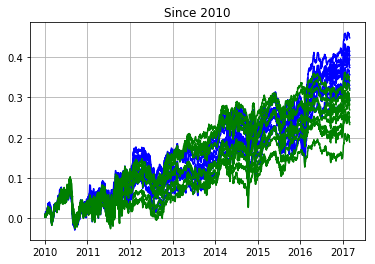

In [55]:
t = dt.date(2010, 1, 1)
plt.figure()
plt.plot(combB0.best_results_returns.loc[t:].cumsum(), 'b')
plt.plot(combB3.best_results_returns.loc[t:].cumsum(), 'g')
plt.grid()
plt.title('Since 2010')
plt.show()